In [1]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-08-06 21:06:41,972	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.15
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


In [2]:
seed = 20230806
np.random.seed(seed)
n_replications = 2000

min_power = 3
max_power = 14
base = 2

gamma = 0.1
var = 1
lamda = -1
varlow = 1
varhigh = 2

n = 200
rng = np.random.default_rng(seed)
EFG_results = []
ratios = np.arange(0, 51, 1)/50

In [ ]:
# lot of experiments to do (50*12 = 600)

In [ ]:
for power in np.arange(min_power, max_power+1):
    print("------------------------------------The $k$ is {}------------------------------------".format(2**power))
    for ratio in ratios:
        print("The allocated ratio is {}".format(ratio))
        SCCVgenerators =  [SCCVGenerator(base**power, gamma, var) for i in range(n_replications)]
        EMCVgenerators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]
        EMIVgenerators =  [EMIVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
        EMDVgenerators =  [EMDVGenerator(base**power, gamma, lamda, varlow, varhigh) for i in range(n_replications)]
        generator_types = [SCCVgenerators, EMCVgenerators, EMIVgenerators, EMDVgenerators]
        for i, generators in enumerate(generator_types):
            print("----------------***********************Generator Type {}***********************----------------".format(i))
            n0 = np.int32(n*ratio)
            if n0 == 0:
                n0 = 1
            ng = n-n0
            print("EFG")
            PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
            EFG_results.append(PCS)
    print(EFG_results)

------------------------------------The $k$ is 8------------------------------------
The allocated ratio is 0.0
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:06:56 2023
PCS:0.2445, PGS:0.2445
Total time used: 1.8682904243469238s, simulation ends at Sun Aug  6 21:06:57 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:06:58 2023
PCS:0.5165, PGS:0.5165
Total time used: 1.1425881385803223s, simulation ends at Sun Aug  6 21:06:58 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:06:59 2023
PCS:0.5505, PGS:0.5505
Total time used: 1.1654183864593506s, simul

Start to simulate... at Sun Aug  6 21:07:31 2023
PCS:0.91, PGS:0.91
Total time used: 1.29664945602417s, simulation ends at Sun Aug  6 21:07:31 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:07:32 2023
PCS:0.8235, PGS:0.8235
Total time used: 1.3591394424438477s, simulation ends at Sun Aug  6 21:07:32 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:07:34 2023
PCS:0.4795, PGS:0.4795
Total time used: 1.3122718334197998s, simulation ends at Sun Aug  6 21:07:34 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:07:35 2023
PC

Start to simulate... at Sun Aug  6 21:08:06 2023
PCS:0.578, PGS:0.578
Total time used: 1.3122715950012207s, simulation ends at Sun Aug  6 21:08:06 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:08:07 2023
PCS:0.964, PGS:0.964
Total time used: 1.3435161113739014s, simulation ends at Sun Aug  6 21:08:07 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:08:09 2023
PCS:0.9725, PGS:0.9725
Total time used: 1.3122711181640625s, simulation ends at Sun Aug  6 21:08:09 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:08:10 2023
PCS:0.91, PGS:0.91
Total tim

Start to simulate... at Sun Aug  6 21:08:42 2023
PCS:0.9345, PGS:0.9345
Total time used: 1.3122708797454834s, simulation ends at Sun Aug  6 21:08:42 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:08:44 2023
PCS:0.5835, PGS:0.5835
Total time used: 1.2966477870941162s, simulation ends at Sun Aug  6 21:08:44 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:08:45 2023
PCS:0.9825, PGS:0.9825
Total time used: 1.3435161113739014s, simulation ends at Sun Aug  6 21:08:45 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:08:46 20

Start to simulate... at Sun Aug  6 21:09:17 2023
PCS:0.992, PGS:0.992
Total time used: 1.3122715950012207s, simulation ends at Sun Aug  6 21:09:17 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:09:18 2023
PCS:0.99, PGS:0.99
Total time used: 1.3122711181640625s, simulation ends at Sun Aug  6 21:09:18 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:09:20 2023
PCS:0.953, PGS:0.953
Total time used: 1.3435161113739014s, simulation ends at Sun Aug  6 21:09:20 2023
The allocated ratio is 0.54
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:09:21 2023
PCS:

Start to simulate... at Sun Aug  6 21:09:53 2023
PCS:0.5915, PGS:0.5915
Total time used: 1.3122966289520264s, simulation ends at Sun Aug  6 21:09:53 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:09:54 2023
PCS:0.9925, PGS:0.9925
Total time used: 1.3122467994689941s, simulation ends at Sun Aug  6 21:09:54 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:09:56 2023
PCS:0.994, PGS:0.994
Total time used: 1.2966489791870117s, simulation ends at Sun Aug  6 21:09:56 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:09:57 2023
PCS:0.9665, PGS:0.9665
Tot

Start to simulate... at Sun Aug  6 21:10:29 2023
PCS:0.9675, PGS:0.9675
Total time used: 1.2966487407684326s, simulation ends at Sun Aug  6 21:10:29 2023
The allocated ratio is 0.8
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:10:30 2023
PCS:0.6005, PGS:0.6005
Total time used: 1.2966485023498535s, simulation ends at Sun Aug  6 21:10:31 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:10:32 2023
PCS:0.9945, PGS:0.9945
Total time used: 1.3278944492340088s, simulation ends at Sun Aug  6 21:10:32 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:10:33 20

Start to simulate... at Sun Aug  6 21:11:04 2023
PCS:0.9955, PGS:0.9955
Total time used: 1.2810256481170654s, simulation ends at Sun Aug  6 21:11:04 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:11:05 2023
PCS:0.99, PGS:0.99
Total time used: 1.296649694442749s, simulation ends at Sun Aug  6 21:11:05 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:11:06 2023
PCS:0.956, PGS:0.956
Total time used: 1.3278932571411133s, simulation ends at Sun Aug  6 21:11:06 2023
The allocated ratio is 0.94
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 21:11:08 2023
PCS

Start to simulate... at Sun Aug  6 21:11:31 2023
PCS:0.449, PGS:0.449
Total time used: 1.187293529510498s, simulation ends at Sun Aug  6 21:11:31 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:11:32 2023
PCS:0.354, PGS:0.354
Total time used: 1.2654047012329102s, simulation ends at Sun Aug  6 21:11:32 2023
The allocated ratio is 0.02
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:11:34 2023
PCS:0.2465, PGS:0.2465
Total time used: 1.3591387271881104s, simulation ends at Sun Aug  6 21:11:34 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:11:35 202

Start to simulate... at Sun Aug  6 21:12:07 2023
PCS:0.427, PGS:0.427
Total time used: 1.3435158729553223s, simulation ends at Sun Aug  6 21:12:07 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:12:08 2023
PCS:0.827, PGS:0.827
Total time used: 1.3591384887695312s, simulation ends at Sun Aug  6 21:12:09 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:12:10 2023
PCS:0.8265, PGS:0.8265
Total time used: 1.3278944492340088s, simulation ends at Sun Aug  6 21:12:10 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:12:11 2023
PCS:0.725, PGS:0.725
Tota

Start to simulate... at Sun Aug  6 21:12:43 2023
PCS:0.9205, PGS:0.9205
Total time used: 1.3278939723968506s, simulation ends at Sun Aug  6 21:12:43 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:12:44 2023
PCS:0.8135, PGS:0.8135
Total time used: 1.3278932571411133s, simulation ends at Sun Aug  6 21:12:44 2023
The allocated ratio is 0.28
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:12:46 2023
PCS:0.522, PGS:0.522
Total time used: 1.343515396118164s, simulation ends at Sun Aug  6 21:12:46 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:12:47 2

Start to simulate... at Sun Aug  6 21:13:18 2023
PCS:0.545, PGS:0.545
Total time used: 1.3278942108154297s, simulation ends at Sun Aug  6 21:13:18 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:13:20 2023
PCS:0.948, PGS:0.948
Total time used: 1.3591375350952148s, simulation ends at Sun Aug  6 21:13:20 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:13:21 2023
PCS:0.955, PGS:0.955
Total time used: 1.312272071838379s, simulation ends at Sun Aug  6 21:13:21 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:13:22 2023
PCS:0.8725, PGS:0.8725
Total

Start to simulate... at Sun Aug  6 21:13:53 2023
PCS:0.9565, PGS:0.9565
Total time used: 1.3435161113739014s, simulation ends at Sun Aug  6 21:13:53 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:13:55 2023
PCS:0.8945, PGS:0.8945
Total time used: 1.3122718334197998s, simulation ends at Sun Aug  6 21:13:55 2023
The allocated ratio is 0.54
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:13:56 2023
PCS:0.5425, PGS:0.5425
Total time used: 1.3122715950012207s, simulation ends at Sun Aug  6 21:13:56 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:13:5

Start to simulate... at Sun Aug  6 21:14:28 2023
PCS:0.557, PGS:0.557
Total time used: 1.3903827667236328s, simulation ends at Sun Aug  6 21:14:29 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:14:30 2023
PCS:0.9735, PGS:0.9735
Total time used: 1.3122713565826416s, simulation ends at Sun Aug  6 21:14:30 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:14:31 2023
PCS:0.975, PGS:0.975
Total time used: 1.3278939723968506s, simulation ends at Sun Aug  6 21:14:31 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:14:32 2023
PCS:0.927, PGS:0.927
Tota

Start to simulate... at Sun Aug  6 21:15:05 2023
PCS:0.9085, PGS:0.9085
Total time used: 1.3591384887695312s, simulation ends at Sun Aug  6 21:15:05 2023
The allocated ratio is 0.8
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:15:06 2023
PCS:0.5165, PGS:0.5165
Total time used: 1.3435163497924805s, simulation ends at Sun Aug  6 21:15:06 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:15:08 2023
PCS:0.978, PGS:0.978
Total time used: 1.3122711181640625s, simulation ends at Sun Aug  6 21:15:08 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:15:09 2

Start to simulate... at Sun Aug  6 21:15:40 2023
PCS:0.969, PGS:0.969
Total time used: 1.3278939723968506s, simulation ends at Sun Aug  6 21:15:40 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:15:41 2023
PCS:0.9715, PGS:0.9715
Total time used: 1.2966489791870117s, simulation ends at Sun Aug  6 21:15:41 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:15:42 2023
PCS:0.891, PGS:0.891
Total time used: 1.312272071838379s, simulation ends at Sun Aug  6 21:15:42 2023
The allocated ratio is 0.94
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 21:15:44 202

Start to simulate... at Sun Aug  6 21:16:05 2023
PCS:0.1565, PGS:0.1565
Total time used: 1.655961275100708s, simulation ends at Sun Aug  6 21:16:06 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:16:07 2023
PCS:0.3675, PGS:0.3675
Total time used: 1.671583890914917s, simulation ends at Sun Aug  6 21:16:07 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:16:09 2023
PCS:0.3375, PGS:0.3375
Total time used: 1.6247174739837646s, simulation ends at Sun Aug  6 21:16:09 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:16:10 2023
PCS:0.283, PGS:0.283
To

Start to simulate... at Sun Aug  6 21:16:55 2023
PCS:0.6145, PGS:0.6145
Total time used: 1.8121843338012695s, simulation ends at Sun Aug  6 21:16:55 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:16:57 2023
PCS:0.416, PGS:0.416
Total time used: 1.8746788501739502s, simulation ends at Sun Aug  6 21:16:57 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:16:59 2023
PCS:0.766, PGS:0.766
Total time used: 1.7653119564056396s, simulation ends at Sun Aug  6 21:16:59 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:17:01 20

Start to simulate... at Sun Aug  6 21:17:40 2023
PCS:0.8455, PGS:0.8455
Total time used: 1.671583652496338s, simulation ends at Sun Aug  6 21:17:40 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:17:42 2023
PCS:0.849, PGS:0.849
Total time used: 1.6403396129608154s, simulation ends at Sun Aug  6 21:17:42 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:17:43 2023
PCS:0.728, PGS:0.728
Total time used: 1.6090946197509766s, simulation ends at Sun Aug  6 21:17:43 2023
The allocated ratio is 0.28
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:17:45 202

Start to simulate... at Sun Aug  6 21:18:22 2023
PCS:0.781, PGS:0.781
Total time used: 1.4997389316558838s, simulation ends at Sun Aug  6 21:18:22 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:18:24 2023
PCS:0.5485, PGS:0.5485
Total time used: 1.5309836864471436s, simulation ends at Sun Aug  6 21:18:24 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:18:25 2023
PCS:0.895, PGS:0.895
Total time used: 1.577850103378296s, simulation ends at Sun Aug  6 21:18:25 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:18:27 2023

Start to simulate... at Sun Aug  6 21:19:02 2023
PCS:0.9235, PGS:0.9235
Total time used: 1.499737024307251s, simulation ends at Sun Aug  6 21:19:02 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:19:03 2023
PCS:0.9275, PGS:0.9275
Total time used: 1.4528717994689941s, simulation ends at Sun Aug  6 21:19:03 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:19:05 2023
PCS:0.838, PGS:0.838
Total time used: 1.484116792678833s, simulation ends at Sun Aug  6 21:19:05 2023
The allocated ratio is 0.54
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:19:06 20

Start to simulate... at Sun Aug  6 21:19:42 2023
PCS:0.5455, PGS:0.5455
Total time used: 1.4216272830963135s, simulation ends at Sun Aug  6 21:19:42 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:19:43 2023
PCS:0.9465, PGS:0.9465
Total time used: 1.4216279983520508s, simulation ends at Sun Aug  6 21:19:43 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:19:45 2023
PCS:0.951, PGS:0.951
Total time used: 1.4684944152832031s, simulation ends at Sun Aug  6 21:19:45 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:19:46 2023
PCS:0.855, PGS:0.855
To

Start to simulate... at Sun Aug  6 21:20:20 2023
PCS:0.946, PGS:0.946
Total time used: 1.4372494220733643s, simulation ends at Sun Aug  6 21:20:20 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:20:21 2023
PCS:0.8655, PGS:0.8655
Total time used: 1.4060049057006836s, simulation ends at Sun Aug  6 21:20:21 2023
The allocated ratio is 0.8
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:20:23 2023
PCS:0.46, PGS:0.46
Total time used: 1.4528725147247314s, simulation ends at Sun Aug  6 21:20:23 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:20:24 2023


Start to simulate... at Sun Aug  6 21:20:57 2023
PCS:0.385, PGS:0.385
Total time used: 1.4528677463531494s, simulation ends at Sun Aug  6 21:20:57 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:20:59 2023
PCS:0.952, PGS:0.952
Total time used: 1.4060051441192627s, simulation ends at Sun Aug  6 21:20:59 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:21:00 2023
PCS:0.946, PGS:0.946
Total time used: 1.4216275215148926s, simulation ends at Sun Aug  6 21:21:00 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 21:21:02 2023
PCS:0.8185, PGS:0.8185
Tota

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:21:27 2023
PCS:0.146, PGS:0.146
Total time used: 2.9213662147521973s, simulation ends at Sun Aug  6 21:21:28 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:21:29 2023
PCS:0.291, PGS:0.291
Total time used: 2.9213662147521973s, simulation ends at Sun Aug  6 21:21:31 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:21:32 2023
PCS:0.279, PGS:0.279
Total time used: 2.9213666915893555s, simulation ends at Sun Aug  6 21:21:33 2023
----------------***********************Generator Type 3*********************

Start to simulate... at Sun Aug  6 21:22:39 2023
PCS:0.6485, PGS:0.6485
Total time used: 2.577676296234131s, simulation ends at Sun Aug  6 21:22:40 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:22:42 2023
PCS:0.506, PGS:0.506
Total time used: 2.6089208126068115s, simulation ends at Sun Aug  6 21:22:43 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:22:45 2023
PCS:0.4105, PGS:0.4105
Total time used: 2.562054395675659s, simulation ends at Sun Aug  6 21:22:45 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:22:47 20

Start to simulate... at Sun Aug  6 21:23:44 2023
PCS:0.48, PGS:0.48
Total time used: 2.2652299404144287s, simulation ends at Sun Aug  6 21:23:44 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:23:46 2023
PCS:0.7725, PGS:0.7725
Total time used: 2.280852794647217s, simulation ends at Sun Aug  6 21:23:46 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:23:49 2023
PCS:0.7545, PGS:0.7545
Total time used: 2.265230894088745s, simulation ends at Sun Aug  6 21:23:49 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:23:51 2023
PCS:0.64, PGS:0.64
Total ti

Start to simulate... at Sun Aug  6 21:24:43 2023
PCS:0.7045, PGS:0.7045
Total time used: 2.077763080596924s, simulation ends at Sun Aug  6 21:24:44 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:24:46 2023
PCS:0.538, PGS:0.538
Total time used: 2.187119245529175s, simulation ends at Sun Aug  6 21:24:46 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:24:48 2023
PCS:0.8475, PGS:0.8475
Total time used: 2.0152738094329834s, simulation ends at Sun Aug  6 21:24:48 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:24:50 202

Start to simulate... at Sun Aug  6 21:25:35 2023
PCS:0.8795, PGS:0.8795
Total time used: 1.8902957439422607s, simulation ends at Sun Aug  6 21:25:35 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:25:36 2023
PCS:0.885, PGS:0.885
Total time used: 1.7965621948242188s, simulation ends at Sun Aug  6 21:25:37 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:25:38 2023
PCS:0.7625, PGS:0.7625
Total time used: 1.8746743202209473s, simulation ends at Sun Aug  6 21:25:38 2023
The allocated ratio is 0.54
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:25:40 

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:26:20 2023
PCS:0.512, PGS:0.512
Total time used: 1.5153610706329346s, simulation ends at Sun Aug  6 21:26:20 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:26:21 2023
PCS:0.91, PGS:0.91
Total time used: 1.5153613090515137s, simulation ends at Sun Aug  6 21:26:22 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:26:23 2023
PCS:0.9145, PGS:0.9145
Total time used: 1.4997386932373047s, simulation ends at Sun Aug  6 21:26:23 2023
----------------***********************Generator Type 3*********************

Start to simulate... at Sun Aug  6 21:26:59 2023
PCS:0.9215, PGS:0.9215
Total time used: 1.4372494220733643s, simulation ends at Sun Aug  6 21:26:59 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:27:01 2023
PCS:0.7995, PGS:0.7995
Total time used: 1.468494176864624s, simulation ends at Sun Aug  6 21:27:01 2023
The allocated ratio is 0.8
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:27:02 2023
PCS:0.4605, PGS:0.4605
Total time used: 1.4372501373291016s, simulation ends at Sun Aug  6 21:27:02 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:27:04 

Start to simulate... at Sun Aug  6 21:27:37 2023
PCS:0.3205, PGS:0.3205
Total time used: 1.4216272830963135s, simulation ends at Sun Aug  6 21:27:37 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:27:38 2023
PCS:0.906, PGS:0.906
Total time used: 1.406005620956421s, simulation ends at Sun Aug  6 21:27:38 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:27:40 2023
PCS:0.918, PGS:0.918
Total time used: 1.4216270446777344s, simulation ends at Sun Aug  6 21:27:40 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 21:27:41 2023
PCS:0.774, PGS:0.774
Total

Start to simulate... at Sun Aug  6 21:28:06 2023
PCS:0.1405, PGS:0.1405
Total time used: 5.639642953872681s, simulation ends at Sun Aug  6 21:28:10 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:28:12 2023
PCS:0.242, PGS:0.242
Total time used: 5.68651008605957s, simulation ends at Sun Aug  6 21:28:16 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:28:17 2023
PCS:0.2435, PGS:0.2435
Total time used: 5.639642238616943s, simulation ends at Sun Aug  6 21:28:21 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:28:23 2023
PCS:0.184, PGS:0.184
Tot

PCS:0.579, PGS:0.579
Total time used: 5.01475191116333s, simulation ends at Sun Aug  6 21:30:30 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:30:32 2023
PCS:0.452, PGS:0.452
Total time used: 5.030373811721802s, simulation ends at Sun Aug  6 21:30:35 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:30:37 2023
PCS:0.378, PGS:0.378
Total time used: 4.905395984649658s, simulation ends at Sun Aug  6 21:30:40 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:30:42 2023
PCS:0.5935, PGS:0.5935
Total time used: 4.9053955

PCS:0.479, PGS:0.479
Total time used: 4.2648820877075195s, simulation ends at Sun Aug  6 21:32:32 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:32:34 2023
PCS:0.74, PGS:0.74
Total time used: 4.2805047035217285s, simulation ends at Sun Aug  6 21:32:36 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:32:38 2023
PCS:0.7205, PGS:0.7205
Total time used: 4.2648820877075195s, simulation ends at Sun Aug  6 21:32:41 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:32:43 2023
PCS:0.5805, PGS:0.5805
Total time used: 4.264882564544678s, simulation en

PCS:0.7935, PGS:0.7935
Total time used: 3.639991283416748s, simulation ends at Sun Aug  6 21:34:15 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:34:17 2023
PCS:0.6555, PGS:0.6555
Total time used: 3.624368667602539s, simulation ends at Sun Aug  6 21:34:19 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:34:21 2023
PCS:0.5245, PGS:0.5245
Total time used: 3.515012741088867s, simulation ends at Sun Aug  6 21:34:23 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:34:25 2023
PCS:0.807, PGS:0.807
Total time used: 3.483

PCS:0.5475, PGS:0.5475
Total time used: 2.8276329040527344s, simulation ends at Sun Aug  6 21:35:40 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:35:43 2023
PCS:0.8475, PGS:0.8475
Total time used: 2.843254804611206s, simulation ends at Sun Aug  6 21:35:43 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:35:45 2023
PCS:0.8595, PGS:0.8595
Total time used: 2.8744993209838867s, simulation ends at Sun Aug  6 21:35:46 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:35:48 2023
PCS:0.7105, PGS:0.7105
Total time used: 2.858877182006836s, simulati

PCS:0.8655, PGS:0.8655
Total time used: 2.2496109008789062s, simulation ends at Sun Aug  6 21:36:47 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:36:49 2023
PCS:0.7355, PGS:0.7355
Total time used: 2.280850648880005s, simulation ends at Sun Aug  6 21:36:50 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:36:52 2023
PCS:0.5165, PGS:0.5165
Total time used: 2.1090080738067627s, simulation ends at Sun Aug  6 21:36:52 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:36:54 2023
PCS:0.8815, PGS:0.8815
Total time used: 

Start to simulate... at Sun Aug  6 21:37:43 2023
PCS:0.899, PGS:0.899
Total time used: 1.749695062637329s, simulation ends at Sun Aug  6 21:37:43 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:37:45 2023
PCS:0.895, PGS:0.895
Total time used: 1.7496957778930664s, simulation ends at Sun Aug  6 21:37:45 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:37:47 2023
PCS:0.7725, PGS:0.7725
Total time used: 1.7340726852416992s, simulation ends at Sun Aug  6 21:37:47 2023
The allocated ratio is 0.8
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:37:49 2

Start to simulate... at Sun Aug  6 21:38:25 2023
PCS:0.749, PGS:0.749
Total time used: 1.468494176864624s, simulation ends at Sun Aug  6 21:38:26 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:38:27 2023
PCS:0.291, PGS:0.291
Total time used: 1.4372496604919434s, simulation ends at Sun Aug  6 21:38:27 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:38:28 2023
PCS:0.892, PGS:0.892
Total time used: 1.4216279983520508s, simulation ends at Sun Aug  6 21:38:29 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=128----------------------
Start to simulate... at Sun Aug  6 21:38:30 20

Start to simulate... at Sun Aug  6 21:38:56 2023
PCS:0.12, PGS:0.12
Total time used: 11.15430760383606s, simulation ends at Sun Aug  6 21:39:06 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:39:08 2023
PCS:0.233, PGS:0.233
Total time used: 11.12306261062622s, simulation ends at Sun Aug  6 21:39:17 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:39:19 2023
PCS:0.217, PGS:0.217
Total time used: 11.18555235862732s, simulation ends at Sun Aug  6 21:39:28 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:39:30 2023
PCS:0.168, PGS:0.168
Total ti

Start to simulate... at Sun Aug  6 21:43:33 2023
PCS:0.553, PGS:0.553
Total time used: 9.90443730354309s, simulation ends at Sun Aug  6 21:43:41 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:43:43 2023
PCS:0.382, PGS:0.382
Total time used: 9.966929197311401s, simulation ends at Sun Aug  6 21:43:51 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:43:53 2023
PCS:0.405, PGS:0.405
Total time used: 9.685733318328857s, simulation ends at Sun Aug  6 21:44:01 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:44:03 2023


Start to simulate... at Sun Aug  6 21:47:34 2023
PCS:0.4595, PGS:0.4595
Total time used: 8.436001777648926s, simulation ends at Sun Aug  6 21:47:40 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:47:42 2023
PCS:0.6735, PGS:0.6735
Total time used: 8.3422691822052s, simulation ends at Sun Aug  6 21:47:49 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:47:51 2023
PCS:0.6715, PGS:0.6715
Total time used: 8.326647281646729s, simulation ends at Sun Aug  6 21:47:57 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:47:59 2023
PCS:0.529, PGS:0.529
To

Start to simulate... at Sun Aug  6 21:50:57 2023
PCS:0.7725, PGS:0.7725
Total time used: 7.061260223388672s, simulation ends at Sun Aug  6 21:51:02 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:51:04 2023
PCS:0.6175, PGS:0.6175
Total time used: 7.061258792877197s, simulation ends at Sun Aug  6 21:51:09 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:51:11 2023
PCS:0.5185, PGS:0.5185
Total time used: 6.858170509338379s, simulation ends at Sun Aug  6 21:51:16 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:51:18

Start to simulate... at Sun Aug  6 21:53:43 2023
PCS:0.5525, PGS:0.5525
Total time used: 5.545904159545898s, simulation ends at Sun Aug  6 21:53:47 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:53:48 2023
PCS:0.811, PGS:0.811
Total time used: 5.499038219451904s, simulation ends at Sun Aug  6 21:53:52 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:53:54 2023
PCS:0.8035, PGS:0.8035
Total time used: 5.530282258987427s, simulation ends at Sun Aug  6 21:53:58 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:53:59 2023
PCS:0.6685, PGS:0.6685


Start to simulate... at Sun Aug  6 21:55:52 2023
PCS:0.847, PGS:0.847
Total time used: 4.218013048171997s, simulation ends at Sun Aug  6 21:55:54 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:55:56 2023
PCS:0.7055, PGS:0.7055
Total time used: 4.249257802963257s, simulation ends at Sun Aug  6 21:55:59 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:56:01 2023
PCS:0.546, PGS:0.546
Total time used: 4.030546426773071s, simulation ends at Sun Aug  6 21:56:03 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:56:05 20

Start to simulate... at Sun Aug  6 21:57:25 2023
PCS:0.48, PGS:0.48
Total time used: 2.671409845352173s, simulation ends at Sun Aug  6 21:57:25 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:57:27 2023
PCS:0.8775, PGS:0.8775
Total time used: 2.687032461166382s, simulation ends at Sun Aug  6 21:57:28 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:57:30 2023
PCS:0.868, PGS:0.868
Total time used: 2.718275547027588s, simulation ends at Sun Aug  6 21:57:31 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:57:33 2023
PCS:0.7205, PGS:0.7205
Tota

Start to simulate... at Sun Aug  6 21:58:23 2023
PCS:0.8815, PGS:0.8815
Total time used: 1.7028284072875977s, simulation ends at Sun Aug  6 21:58:23 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:58:24 2023
PCS:0.7215, PGS:0.7215
Total time used: 1.6872062683105469s, simulation ends at Sun Aug  6 21:58:24 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:58:26 2023
PCS:0.273, PGS:0.273
Total time used: 1.671584129333496s, simulation ends at Sun Aug  6 21:58:26 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=256----------------------
Start to simulate... at Sun Aug  6 21:58:2

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 21:58:56 2023
PCS:0.15, PGS:0.15
Total time used: 22.605436086654663s, simulation ends at Sun Aug  6 21:59:17 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 21:59:19 2023
PCS:0.1985, PGS:0.1985
Total time used: 22.199257373809814s, simulation ends at Sun Aug  6 21:59:39 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 21:59:41 2023
PCS:0.1945, PGS:0.1945
Total time used: 22.355480194091797s, simulation ends at Sun Aug  6 22:00:02 2023
----------------***********************Generator Type 3****************

Start to simulate... at Sun Aug  6 22:08:09 2023
PCS:0.4835, PGS:0.4835
Total time used: 19.699693202972412s, simulation ends at Sun Aug  6 22:08:27 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:08:29 2023
PCS:0.3885, PGS:0.3885
Total time used: 19.746559619903564s, simulation ends at Sun Aug  6 22:08:47 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:08:49 2023
PCS:0.382, PGS:0.382
Total time used: 19.48098134994507s, simulation ends at Sun Aug  6 22:09:07 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:09:0

Start to simulate... at Sun Aug  6 22:16:08 2023
PCS:0.484, PGS:0.484
Total time used: 16.76270341873169s, simulation ends at Sun Aug  6 22:16:23 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:16:25 2023
PCS:0.655, PGS:0.655
Total time used: 16.715837955474854s, simulation ends at Sun Aug  6 22:16:39 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:16:41 2023
PCS:0.644, PGS:0.644
Total time used: 16.684593677520752s, simulation ends at Sun Aug  6 22:16:56 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:16:58 2023
PCS:0.5, PGS:0.5
Total ti

Start to simulate... at Sun Aug  6 22:22:52 2023
PCS:0.7275, PGS:0.7275
Total time used: 14.091295957565308s, simulation ends at Sun Aug  6 22:23:04 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:23:05 2023
PCS:0.58, PGS:0.58
Total time used: 14.075671672821045s, simulation ends at Sun Aug  6 22:23:18 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:23:20 2023
PCS:0.5045, PGS:0.5045
Total time used: 13.700738430023193s, simulation ends at Sun Aug  6 22:23:32 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:23:33 

Start to simulate... at Sun Aug  6 22:28:22 2023
PCS:0.541, PGS:0.541
Total time used: 11.076195001602173s, simulation ends at Sun Aug  6 22:28:31 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:28:33 2023
PCS:0.769, PGS:0.769
Total time used: 10.966839790344238s, simulation ends at Sun Aug  6 22:28:42 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:28:44 2023
PCS:0.789, PGS:0.789
Total time used: 10.91997241973877s, simulation ends at Sun Aug  6 22:28:52 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:28:54 2023
PCS:0.636, PGS:0.636
Tota

Start to simulate... at Sun Aug  6 22:32:37 2023
PCS:0.8275, PGS:0.8275
Total time used: 8.29542875289917s, simulation ends at Sun Aug  6 22:32:43 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:32:45 2023
PCS:0.66, PGS:0.66
Total time used: 8.295430421829224s, simulation ends at Sun Aug  6 22:32:51 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:32:53 2023
PCS:0.545, PGS:0.545
Total time used: 7.951739549636841s, simulation ends at Sun Aug  6 22:32:59 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:33:01 2023


Start to simulate... at Sun Aug  6 22:35:37 2023
PCS:0.4825, PGS:0.4825
Total time used: 5.264690399169922s, simulation ends at Sun Aug  6 22:35:40 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:35:42 2023
PCS:0.8525, PGS:0.8525
Total time used: 5.233445882797241s, simulation ends at Sun Aug  6 22:35:45 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:35:47 2023
PCS:0.8465, PGS:0.8465
Total time used: 5.217824459075928s, simulation ends at Sun Aug  6 22:35:51 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:35:53 2023
PCS:0.7, PGS:0.7
Tota

Start to simulate... at Sun Aug  6 22:37:23 2023
PCS:0.867, PGS:0.867
Total time used: 2.593292713165283s, simulation ends at Sun Aug  6 22:37:23 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:37:25 2023
PCS:0.7045, PGS:0.7045
Total time used: 2.5776703357696533s, simulation ends at Sun Aug  6 22:37:26 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:37:28 2023
PCS:0.2645, PGS:0.2645
Total time used: 2.171492338180542s, simulation ends at Sun Aug  6 22:37:28 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=512----------------------
Start to simulate... at Sun Aug  6 22:37:30

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 22:38:03 2023
PCS:0.12, PGS:0.12
Total time used: 45.82006239891052s, simulation ends at Sun Aug  6 22:38:47 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 22:38:49 2023
PCS:0.1855, PGS:0.1855
Total time used: 45.023340940475464s, simulation ends at Sun Aug  6 22:39:33 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 22:39:34 2023
PCS:0.1745, PGS:0.1745
Total time used: 44.89837431907654s, simulation ends at Sun Aug  6 22:40:17 2023
----------------***********************Generator Type 3***************

Start to simulate... at Sun Aug  6 22:56:38 2023
PCS:0.4545, PGS:0.4545
Total time used: 39.930543184280396s, simulation ends at Sun Aug  6 22:57:16 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 22:57:18 2023
PCS:0.3435, PGS:0.3435
Total time used: 39.789942502975464s, simulation ends at Sun Aug  6 22:57:56 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 22:57:58 2023
PCS:0.3975, PGS:0.3975
Total time used: 39.41500782966614s, simulation ends at Sun Aug  6 22:58:36 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 22

Start to simulate... at Sun Aug  6 23:12:44 2023
PCS:0.466, PGS:0.466
Total time used: 33.88472127914429s, simulation ends at Sun Aug  6 23:13:15 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:13:17 2023
PCS:0.611, PGS:0.611
Total time used: 33.58789777755737s, simulation ends at Sun Aug  6 23:13:49 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:13:51 2023
PCS:0.617, PGS:0.617
Total time used: 33.619149923324585s, simulation ends at Sun Aug  6 23:14:23 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:14:25 2023
PCS:0.4865, PGS:0.4865


Start to simulate... at Sun Aug  6 23:26:17 2023
PCS:0.706, PGS:0.706
Total time used: 28.307568073272705s, simulation ends at Sun Aug  6 23:26:43 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:26:46 2023
PCS:0.55, PGS:0.55
Total time used: 28.18259024620056s, simulation ends at Sun Aug  6 23:27:12 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:27:14 2023
PCS:0.508, PGS:0.508
Total time used: 27.698299407958984s, simulation ends at Sun Aug  6 23:27:39 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:27:42 20

Start to simulate... at Sun Aug  6 23:37:20 2023
PCS:0.5345, PGS:0.5345
Total time used: 22.26174569129944s, simulation ends at Sun Aug  6 23:37:41 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:37:43 2023
PCS:0.7795, PGS:0.7795
Total time used: 21.996168851852417s, simulation ends at Sun Aug  6 23:38:03 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:38:05 2023
PCS:0.781, PGS:0.781
Total time used: 21.96492338180542s, simulation ends at Sun Aug  6 23:38:25 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:38:27 2023
PCS:0.613, PGS:0.61

Start to simulate... at Sun Aug  6 23:45:52 2023
PCS:0.795, PGS:0.795
Total time used: 16.684593200683594s, simulation ends at Sun Aug  6 23:46:07 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:46:09 2023
PCS:0.6405, PGS:0.6405
Total time used: 16.60648202896118s, simulation ends at Sun Aug  6 23:46:24 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:46:26 2023
PCS:0.535, PGS:0.535
Total time used: 15.997213125228882s, simulation ends at Sun Aug  6 23:46:40 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:46:

Start to simulate... at Sun Aug  6 23:51:53 2023
PCS:0.5, PGS:0.5
Total time used: 10.545037746429443s, simulation ends at Sun Aug  6 23:52:02 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:52:04 2023
PCS:0.8445, PGS:0.8445
Total time used: 10.35757040977478s, simulation ends at Sun Aug  6 23:52:12 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:52:14 2023
PCS:0.848, PGS:0.848
Total time used: 10.404438018798828s, simulation ends at Sun Aug  6 23:52:23 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:52:25 2023
PCS:0.667, PGS:0.667
Tot

Start to simulate... at Sun Aug  6 23:55:22 2023
PCS:0.8535, PGS:0.8535
Total time used: 5.045996189117432s, simulation ends at Sun Aug  6 23:55:25 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:55:27 2023
PCS:0.684, PGS:0.684
Total time used: 5.0303733348846436s, simulation ends at Sun Aug  6 23:55:30 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:55:32 2023
PCS:0.275, PGS:0.275
Total time used: 4.233637571334839s, simulation ends at Sun Aug  6 23:55:34 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 23:55:3

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Sun Aug  6 23:56:26 2023
PCS:0.145, PGS:0.145
Total time used: 93.49933671951294s, simulation ends at Sun Aug  6 23:57:58 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Sun Aug  6 23:57:59 2023
PCS:0.1635, PGS:0.1635
Total time used: 91.45281982421875s, simulation ends at Sun Aug  6 23:59:29 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Sun Aug  6 23:59:31 2023
PCS:0.174, PGS:0.174
Total time used: 91.46843910217285s, simulation ends at Mon Aug  7 00:01:01 2023
----------------***********************Generator Type 3****************

Start to simulate... at Mon Aug  7 00:34:18 2023
PCS:0.4685, PGS:0.4685
Total time used: 81.01713490486145s, simulation ends at Mon Aug  7 00:35:37 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 00:35:39 2023
PCS:0.3245, PGS:0.3245
Total time used: 80.98589062690735s, simulation ends at Mon Aug  7 00:36:58 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 00:37:00 2023
PCS:0.375, PGS:0.375
Total time used: 80.62657856941223s, simulation ends at Mon Aug  7 00:38:19 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 00:38:

Start to simulate... at Mon Aug  7 01:07:04 2023
PCS:0.4785, PGS:0.4785
Total time used: 69.28469252586365s, simulation ends at Mon Aug  7 01:08:11 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:08:13 2023
PCS:0.602, PGS:0.602
Total time used: 68.59735059738159s, simulation ends at Mon Aug  7 01:09:20 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:09:22 2023
PCS:0.5795, PGS:0.5795
Total time used: 68.37866544723511s, simulation ends at Mon Aug  7 01:10:28 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:10:30 2023
PCS:0.459, PGS:0.459

Start to simulate... at Mon Aug  7 01:34:40 2023
PCS:0.6785, PGS:0.6785
Total time used: 57.39628481864929s, simulation ends at Mon Aug  7 01:35:36 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:35:38 2023
PCS:0.53, PGS:0.53
Total time used: 57.55250787734985s, simulation ends at Mon Aug  7 01:36:33 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:36:36 2023
PCS:0.5345, PGS:0.5345
Total time used: 56.755770206451416s, simulation ends at Mon Aug  7 01:37:30 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:37:33

Start to simulate... at Mon Aug  7 01:57:09 2023
PCS:0.544, PGS:0.544
Total time used: 45.33587384223938s, simulation ends at Mon Aug  7 01:57:52 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:57:54 2023
PCS:0.7635, PGS:0.7635
Total time used: 44.867072343826294s, simulation ends at Mon Aug  7 01:58:37 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:58:39 2023
PCS:0.7405, PGS:0.7405
Total time used: 44.710829734802246s, simulation ends at Mon Aug  7 01:59:21 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 01:59:23 2023
PCS:0.594, PGS:0.5

Start to simulate... at Mon Aug  7 02:14:29 2023
PCS:0.7855, PGS:0.7855
Total time used: 33.915982723236084s, simulation ends at Mon Aug  7 02:15:01 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:15:03 2023
PCS:0.6385, PGS:0.6385
Total time used: 33.775277614593506s, simulation ends at Mon Aug  7 02:15:35 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:15:37 2023
PCS:0.532, PGS:0.532
Total time used: 32.5411102771759s, simulation ends at Mon Aug  7 02:16:08 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:16

Start to simulate... at Mon Aug  7 02:26:40 2023
PCS:0.4785, PGS:0.4785
Total time used: 21.46501636505127s, simulation ends at Mon Aug  7 02:27:00 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:27:02 2023
PCS:0.825, PGS:0.825
Total time used: 21.090083360671997s, simulation ends at Mon Aug  7 02:27:21 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:27:23 2023
PCS:0.8215, PGS:0.8215
Total time used: 21.121329069137573s, simulation ends at Mon Aug  7 02:27:42 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:27:44 2023
PCS:0.6325, PGS:0.

Start to simulate... at Mon Aug  7 02:33:42 2023
PCS:0.841, PGS:0.841
Total time used: 10.091952800750732s, simulation ends at Mon Aug  7 02:33:50 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:33:52 2023
PCS:0.6685, PGS:0.6685
Total time used: 10.107576131820679s, simulation ends at Mon Aug  7 02:34:00 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:34:02 2023
PCS:0.258, PGS:0.258
Total time used: 8.451622247695923s, simulation ends at Mon Aug  7 02:34:09 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=2048----------------------
Start to simulate... at Mon Aug  7 02:34:

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 02:35:41 2023
PCS:0.141, PGS:0.141
Total time used: 193.46601057052612s, simulation ends at Mon Aug  7 02:38:52 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 02:38:54 2023
PCS:0.162, PGS:0.162
Total time used: 189.59189558029175s, simulation ends at Mon Aug  7 02:42:02 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 02:42:04 2023
PCS:0.1545, PGS:0.1545
Total time used: 189.29516696929932s, simulation ends at Mon Aug  7 02:45:11 2023
----------------***********************Generator Type 3*************

Start to simulate... at Mon Aug  7 03:54:10 2023
PCS:0.424, PGS:0.424
Total time used: 168.20519638061523s, simulation ends at Mon Aug  7 03:56:56 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 03:56:58 2023
PCS:0.317, PGS:0.317
Total time used: 168.0936462879181s, simulation ends at Mon Aug  7 03:59:44 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 03:59:48 2023
PCS:0.3915, PGS:0.3915
Total time used: 166.64139413833618s, simulation ends at Mon Aug  7 04:02:32 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 04:02:

Start to simulate... at Mon Aug  7 05:02:04 2023
PCS:0.4925, PGS:0.4925
Total time used: 143.11492228507996s, simulation ends at Mon Aug  7 05:04:24 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 05:04:27 2023
PCS:0.583, PGS:0.583
Total time used: 141.50579524040222s, simulation ends at Mon Aug  7 05:06:45 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 05:06:48 2023
PCS:0.575, PGS:0.575
Total time used: 141.2401487827301s, simulation ends at Mon Aug  7 05:09:07 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 05:09:10 2023
PCS:0.461, PGS:0.461

Start to simulate... at Mon Aug  7 05:59:11 2023
PCS:0.665, PGS:0.665
Total time used: 118.7449140548706s, simulation ends at Mon Aug  7 06:01:07 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 06:01:10 2023
PCS:0.5175, PGS:0.5175
Total time used: 118.77615737915039s, simulation ends at Mon Aug  7 06:03:06 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 06:03:10 2023
PCS:0.5235, PGS:0.5235
Total time used: 117.05770826339722s, simulation ends at Mon Aug  7 06:05:04 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 06:05

Start to simulate... at Mon Aug  7 06:45:43 2023
PCS:0.5405, PGS:0.5405
Total time used: 93.96798491477966s, simulation ends at Mon Aug  7 06:47:14 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 06:47:16 2023
PCS:0.743, PGS:0.743
Total time used: 92.2647111415863s, simulation ends at Mon Aug  7 06:48:46 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 06:48:49 2023
PCS:0.7265, PGS:0.7265
Total time used: 92.09236264228821s, simulation ends at Mon Aug  7 06:50:18 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 06:50:21 2023
PCS:0.5695, PGS:0.569

Start to simulate... at Mon Aug  7 07:21:33 2023
PCS:0.7655, PGS:0.7655
Total time used: 69.69120144844055s, simulation ends at Mon Aug  7 07:22:40 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 07:22:42 2023
PCS:0.619, PGS:0.619
Total time used: 69.86345410346985s, simulation ends at Mon Aug  7 07:23:50 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 07:23:54 2023
PCS:0.5175, PGS:0.5175
Total time used: 67.02002668380737s, simulation ends at Mon Aug  7 07:24:58 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 07:25:

Start to simulate... at Mon Aug  7 07:46:48 2023
PCS:0.4765, PGS:0.4765
Total time used: 44.08596682548523s, simulation ends at Mon Aug  7 07:47:29 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 07:47:32 2023
PCS:0.823, PGS:0.823
Total time used: 43.414225339889526s, simulation ends at Mon Aug  7 07:48:13 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 07:48:15 2023
PCS:0.8255, PGS:0.8255
Total time used: 43.2892587184906s, simulation ends at Mon Aug  7 07:48:56 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 07:48:59 2023
PCS:0.6435, PGS:0.64

Start to simulate... at Mon Aug  7 08:01:18 2023
PCS:0.8565, PGS:0.8565
Total time used: 20.715134620666504s, simulation ends at Mon Aug  7 08:01:37 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 08:01:39 2023
PCS:0.6525, PGS:0.6525
Total time used: 20.71513557434082s, simulation ends at Mon Aug  7 08:01:57 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 08:02:02 2023
PCS:0.2715, PGS:0.2715
Total time used: 17.293850421905518s, simulation ends at Mon Aug  7 08:02:16 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=4096----------------------
Start to simulate... at Mon Aug  7 08

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 08:05:24 2023
PCS:0.134, PGS:0.134
Total time used: 408.9656946659088s, simulation ends at Mon Aug  7 08:12:10 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 08:12:13 2023
PCS:0.1385, PGS:0.1385
Total time used: 399.7326993942261s, simulation ends at Mon Aug  7 08:18:50 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 08:18:52 2023
PCS:0.1385, PGS:0.1385
Total time used: 400.0708043575287s, simulation ends at Mon Aug  7 08:25:30 2023
----------------***********************Generator Type 3**************

Start to simulate... at Mon Aug  7 10:50:57 2023
PCS:0.433, PGS:0.433
Total time used: 353.4226951599121s, simulation ends at Mon Aug  7 10:56:47 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 10:56:50 2023
PCS:0.3365, PGS:0.3365
Total time used: 352.4072573184967s, simulation ends at Mon Aug  7 11:02:40 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 11:02:46 2023
PCS:0.3935, PGS:0.3935
Total time used: 350.8762640953064s, simulation ends at Mon Aug  7 11:08:34 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 11:08:

Start to simulate... at Mon Aug  7 13:13:37 2023
PCS:0.469, PGS:0.469
Total time used: 302.1246347427368s, simulation ends at Mon Aug  7 13:18:36 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 13:18:39 2023
PCS:0.5625, PGS:0.5625
Total time used: 296.4720940589905s, simulation ends at Mon Aug  7 13:23:32 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 13:23:35 2023
PCS:0.581, PGS:0.581
Total time used: 297.50119638442993s, simulation ends at Mon Aug  7 13:28:30 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 13:28:33 2023
PCS:0.439, PGS:0.439


Start to simulate... at Mon Aug  7 15:13:45 2023
PCS:0.666, PGS:0.666
Total time used: 250.22198152542114s, simulation ends at Mon Aug  7 15:17:52 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 15:17:55 2023
PCS:0.523, PGS:0.523
Total time used: 249.55004501342773s, simulation ends at Mon Aug  7 15:22:02 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 15:22:08 2023
PCS:0.524, PGS:0.524
Total time used: 244.72274470329285s, simulation ends at Mon Aug  7 15:26:10 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 15:26:13

Start to simulate... at Mon Aug  7 16:51:37 2023
PCS:0.525, PGS:0.525
Total time used: 196.98103761672974s, simulation ends at Mon Aug  7 16:54:51 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 16:54:54 2023
PCS:0.729, PGS:0.729
Total time used: 193.84109544754028s, simulation ends at Mon Aug  7 16:58:05 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 16:58:08 2023
PCS:0.732, PGS:0.732
Total time used: 193.7630434036255s, simulation ends at Mon Aug  7 17:01:19 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 17:01:21 2023
PCS:0.577, PGS:0.577
T

Start to simulate... at Mon Aug  7 18:07:07 2023
PCS:0.7795, PGS:0.7795
Total time used: 146.42768621444702s, simulation ends at Mon Aug  7 18:09:30 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 18:09:33 2023
PCS:0.6045, PGS:0.6045
Total time used: 146.82141160964966s, simulation ends at Mon Aug  7 18:11:57 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 18:12:04 2023
PCS:0.5165, PGS:0.5165
Total time used: 140.99914503097534s, simulation ends at Mon Aug  7 18:14:22 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 1

Start to simulate... at Mon Aug  7 19:00:17 2023
PCS:0.4835, PGS:0.4835
Total time used: 92.62446904182434s, simulation ends at Mon Aug  7 19:01:47 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 19:01:50 2023
PCS:0.8345, PGS:0.8345
Total time used: 91.18671774864197s, simulation ends at Mon Aug  7 19:03:18 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 19:03:21 2023
PCS:0.796, PGS:0.796
Total time used: 91.24924445152283s, simulation ends at Mon Aug  7 19:04:50 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 19:04:52 2023
PCS:0.6535, PGS:0.65

Start to simulate... at Mon Aug  7 19:30:51 2023
PCS:0.829, PGS:0.829
Total time used: 43.633005142211914s, simulation ends at Mon Aug  7 19:31:32 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 19:31:35 2023
PCS:0.6685, PGS:0.6685
Total time used: 43.57051610946655s, simulation ends at Mon Aug  7 19:32:15 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 19:32:23 2023
PCS:0.278, PGS:0.278
Total time used: 36.165560483932495s, simulation ends at Mon Aug  7 19:32:56 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=8192----------------------
Start to simulate... at Mon Aug  7 19:32:

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Mon Aug  7 19:39:21 2023
PCS:0.1415, PGS:0.1415
Total time used: 932.6721584796906s, simulation ends at Mon Aug  7 19:54:51 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Mon Aug  7 19:54:54 2023
PCS:0.123, PGS:0.123
Total time used: 918.8729567527771s, simulation ends at Mon Aug  7 20:10:10 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Mon Aug  7 20:10:13 2023
PCS:0.148, PGS:0.148
Total time used: 916.8634533882141s, simulation ends at Mon Aug  7 20:25:27 2023
----------------***********************Generator Type 3*************

Start to simulate... at Tue Aug  8 01:59:04 2023
PCS:0.4085, PGS:0.4085
Total time used: 809.8960919380188s, simulation ends at Tue Aug  8 02:12:31 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 02:12:34 2023
PCS:0.3235, PGS:0.3235
Total time used: 809.0113065242767s, simulation ends at Tue Aug  8 02:26:01 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 02:26:11 2023
PCS:0.383, PGS:0.383
Total time used: 803.5472722053528s, simulation ends at Tue Aug  8 02:39:32 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 02:

Start to simulate... at Tue Aug  8 07:26:21 2023
PCS:0.4665, PGS:0.4665
Total time used: 693.4977521896362s, simulation ends at Tue Aug  8 07:37:51 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 07:37:54 2023
PCS:0.557, PGS:0.557
Total time used: 681.7356531620026s, simulation ends at Tue Aug  8 07:49:13 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 07:49:16 2023
PCS:0.557, PGS:0.557
Total time used: 681.1528584957123s, simulation ends at Tue Aug  8 08:00:34 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 08:00:37 2023
PCS:0.436, PGS:0.43

Start to simulate... at Tue Aug  8 12:02:04 2023
PCS:0.6575, PGS:0.6575
Total time used: 570.8897116184235s, simulation ends at Tue Aug  8 12:11:33 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 12:11:35 2023
PCS:0.505, PGS:0.505
Total time used: 572.8957343101501s, simulation ends at Tue Aug  8 12:21:05 2023
The allocated ratio is 0.4
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 12:21:18 2023
PCS:0.5115, PGS:0.5115
Total time used: 561.3230218887329s, simulation ends at Tue Aug  8 12:30:37 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 12:3

Start to simulate... at Tue Aug  8 15:46:53 2023
PCS:0.5525, PGS:0.5525
Total time used: 451.6881639957428s, simulation ends at Tue Aug  8 15:54:22 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 15:54:25 2023
PCS:0.7225, PGS:0.7225
Total time used: 446.07853746414185s, simulation ends at Tue Aug  8 16:01:48 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 16:01:51 2023
PCS:0.727, PGS:0.727
Total time used: 446.4232439994812s, simulation ends at Tue Aug  8 16:09:15 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 16:09:17 2023
PCS:0.5565, PGS:

Start to simulate... at Tue Aug  8 18:40:21 2023
PCS:0.7875, PGS:0.7875
Total time used: 336.47668838500977s, simulation ends at Tue Aug  8 18:45:55 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 18:45:57 2023
PCS:0.6045, PGS:0.6045
Total time used: 336.2847509384155s, simulation ends at Tue Aug  8 18:51:31 2023
The allocated ratio is 0.66
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 18:51:45 2023
PCS:0.533, PGS:0.533
Total time used: 323.03719997406006s, simulation ends at Tue Aug  8 18:57:06 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 1

Start to simulate... at Tue Aug  8 20:42:19 2023
PCS:0.4955, PGS:0.4955
Total time used: 211.89892625808716s, simulation ends at Tue Aug  8 20:45:48 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 20:45:50 2023
PCS:0.802, PGS:0.802
Total time used: 208.85823965072632s, simulation ends at Tue Aug  8 20:49:17 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 20:49:19 2023
PCS:0.81, PGS:0.81
Total time used: 208.8537781238556s, simulation ends at Tue Aug  8 20:52:45 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 20:52:48 2023
PCS:0.652, PGS:0.65

Start to simulate... at Tue Aug  8 21:52:24 2023
PCS:0.818, PGS:0.818
Total time used: 99.23227095603943s, simulation ends at Tue Aug  8 21:54:01 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 21:54:03 2023
PCS:0.6665, PGS:0.6665
Total time used: 99.43547368049622s, simulation ends at Tue Aug  8 21:55:40 2023
The allocated ratio is 0.92
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 21:55:56 2023
PCS:0.2715, PGS:0.2715
Total time used: 82.01897025108337s, simulation ends at Tue Aug  8 21:57:16 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=16384----------------------
Start to simulate... at Tue Aug  8 21:

----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=32768----------------------
Start to simulate... at Tue Aug  8 22:11:51 2023
PCS:0.123, PGS:0.123
Total time used: 2339.1090607643127s, simulation ends at Tue Aug  8 22:50:47 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32768----------------------
Start to simulate... at Tue Aug  8 22:50:50 2023
PCS:0.149, PGS:0.149
Total time used: 2307.204437494278s, simulation ends at Tue Aug  8 23:29:14 2023
----------------***********************Generator Type 2***********************----------------
EFG
--------New experiments with  k=32768----------------------
Start to simulate... at Tue Aug  8 23:29:17 2023
PCS:0.132, PGS:0.132
Total time used: 2305.0804872512817s, simulation ends at Wed Aug  9 00:07:40 2023
----------------***********************Generator Type 3*************

Start to simulate... at Wed Aug  9 14:06:16 2023
PCS:0.4395, PGS:0.4395
Total time used: 2047.3065078258514s, simulation ends at Wed Aug  9 14:40:20 2023
----------------***********************Generator Type 3***********************----------------
EFG
--------New experiments with  k=32768----------------------
Start to simulate... at Wed Aug  9 14:40:22 2023
PCS:0.305, PGS:0.305
Total time used: 2041.8114440441132s, simulation ends at Wed Aug  9 15:14:21 2023
The allocated ratio is 0.14
----------------***********************Generator Type 0***********************----------------
EFG
--------New experiments with  k=32768----------------------
Start to simulate... at Wed Aug  9 15:14:44 2023
PCS:0.3955, PGS:0.3955
Total time used: 2018.5964193344116s, simulation ends at Wed Aug  9 15:48:19 2023
----------------***********************Generator Type 1***********************----------------
EFG
--------New experiments with  k=32768----------------------
Start to simulate... at Wed Aug  9 

In [3]:
# results drawn from the above experiments for producing the Figure EC4

# EFG_results = [0.2445, 0.5165, 0.5505, 0.449, 0.293, 0.688, 0.684, 0.562, 0.339, 0.774, 
#               0.781, 0.6865, 0.394, 0.8285, 0.8265, 0.722, 0.439, 0.8515, 0.8655, 0.758, 
#               0.432, 0.887, 0.885, 0.792, 0.465, 0.8965, 0.91, 0.8235, 0.4795, 0.9165, 0.934, 
#               0.8325, 0.499, 0.9355, 0.9305, 0.8435, 0.5275, 0.949, 0.9435, 0.865, 0.5475, 
#               0.946, 0.956, 0.8795, 0.535, 0.958, 0.966, 0.8925, 0.523, 0.964, 0.961, 0.8985, 
#               0.578, 0.964, 0.9725, 0.91, 0.5505, 0.97, 0.9725, 0.9015, 0.5755, 0.971, 0.9725, 
#               0.9225, 0.58, 0.976, 0.9775, 0.931, 0.5635, 0.98, 0.9825, 0.9235, 0.5805, 0.9825, 
#               0.9825, 0.94, 0.5815, 0.9805, 0.986, 0.9345, 0.5835, 0.9825, 0.988, 0.9355, 0.5875, 
#               0.989, 0.989, 0.943, 0.6245, 0.9865, 0.989, 0.9495, 0.624, 0.986, 0.9925, 0.9435, 0.6085, 
#               0.991, 0.99, 0.952, 0.599, 0.99, 0.9915, 0.9475, 0.6165, 0.992, 0.99, 0.953, 0.6125, 0.993, 
#               0.996, 0.9625, 0.6095, 0.992, 0.9955, 0.9565, 0.6105, 0.9935, 0.994, 0.9685, 0.6025, 0.994, 
#               0.9955, 0.968, 0.6195, 0.9955, 0.993, 0.964, 0.6005, 0.9945, 0.993, 0.9715, 0.5915, 0.9925, 
#               0.994, 0.9665, 0.624, 0.994, 0.9945, 0.964, 0.6175, 0.9945, 0.996, 0.9695, 0.611, 0.9935, 0.9945, 
#               0.9655, 0.592, 0.9905, 0.996, 0.971, 0.598, 0.994, 0.995, 0.9655, 0.6, 0.9955, 0.994, 0.9675, 
#               0.6005, 0.9945, 0.995, 0.969, 0.5885, 0.9965, 0.995, 0.9565, 0.595, 0.9915, 0.9965, 0.9635, 
#               0.5835, 0.9945, 0.995, 0.9675, 0.5905, 0.996, 0.993, 0.965, 0.559, 0.9895, 0.994, 0.962, 
#               0.5735, 0.9955, 0.99, 0.956, 0.5515, 0.9925, 0.9925, 0.952, 0.526, 0.9905, 0.9875, 0.9555, 
#               0.5285, 0.9875, 0.988, 0.953, 0.5395, 0.989, 0.9845, 0.9495, 0.19, 0.427, 0.449, 0.354, 
#               0.2465, 0.577, 0.565, 0.468, 0.3215, 0.6705, 0.6855, 0.538, 0.3465, 0.717, 0.7015, 0.578, 
#               0.3575, 0.7785, 0.7585, 0.6355, 0.3895, 0.7745, 0.81, 0.668, 0.4285, 0.81, 0.821, 0.7055, 
#               0.427, 0.827, 0.8265, 0.725, 0.4605, 0.8565, 0.8545, 0.747, 0.4875, 0.8655, 0.866, 0.7525, 
#               0.485, 0.884, 0.881, 0.7675, 0.512, 0.8995, 0.8925, 0.7775, 0.513, 0.8925, 0.913, 0.797, 
#               0.515, 0.9175, 0.9205, 0.8135, 0.522, 0.9175, 0.92, 0.8135, 0.5155, 0.925, 0.9095, 0.8325, 
#               0.551, 0.9195, 0.9305, 0.8385, 0.547, 0.9395, 0.93, 0.8445, 0.5445, 0.9435, 0.9455, 0.8485, 
#               0.5615, 0.9475, 0.9475, 0.8605, 0.545, 0.948, 0.955, 0.8725, 0.5665, 0.9535, 0.953, 0.8865, 
#               0.56, 0.9555, 0.9535, 0.883, 0.56, 0.9585, 0.9555, 0.8715, 0.569, 0.965, 0.9585, 0.8945, 0.562, 
#               0.9605, 0.9655, 0.9125, 0.5525, 0.965, 0.9565, 0.8945, 0.5425, 0.9615, 0.965, 0.8995, 0.574, 0.9585, 
#               0.969, 0.9, 0.574, 0.9685, 0.976, 0.9105, 0.562, 0.9715, 0.973, 0.9135, 0.576, 0.97, 0.9705, 0.9065, 
#               0.545, 0.9715, 0.972, 0.9145, 0.557, 0.9735, 0.975, 0.927, 0.5555, 0.977, 0.9765, 0.908, 0.539, 
#               0.977, 0.9755, 0.9115, 0.5375, 0.979, 0.9735, 0.914, 0.527, 0.9715, 0.974, 0.915, 0.536, 0.983, 
#               0.9785, 0.906, 0.5415, 0.976, 0.9805, 0.9085, 0.5165, 0.978, 0.974, 0.915, 0.527, 0.972, 0.9795,
#               0.907, 0.504, 0.9755, 0.9755, 0.9085, 0.4895, 0.9745, 0.9735, 0.903, 0.4515, 0.974, 0.9655, 0.9005, 
#               0.4535, 0.974, 0.9715, 0.903, 0.4595, 0.969, 0.9715, 0.891, 0.439, 0.9655, 0.9635, 0.8935, 0.425, 
#               0.961, 0.954, 0.8595, 0.443, 0.957, 0.945, 0.859, 0.392, 0.9385, 0.929, 0.8395, 0.1565, 0.3675, 
#               0.3375, 0.283, 0.2185, 0.474, 0.458, 0.387, 0.264, 0.553, 0.561, 0.4305, 0.3155, 0.6115, 0.612, 
#               0.499, 0.3475, 0.645, 0.6575, 0.5435, 0.367, 0.681, 0.684, 0.5895, 0.394, 0.7155, 0.7295, 0.6145, 
#               0.416, 0.766, 0.7455, 0.6125, 0.4235, 0.77, 0.774, 0.636, 0.4435, 0.804, 0.778, 0.6495, 0.4655, 
#               0.8115, 0.8125, 0.704, 0.455, 0.8285, 0.81, 0.6865, 0.49, 0.831, 0.82, 0.6895, 0.4855, 0.8455, 
#               0.849, 0.728, 0.4845, 0.8595, 0.847, 0.725, 0.4875, 0.8655, 0.853, 0.7475, 0.5145, 0.8585, 0.8615, 
#               0.763, 0.527, 0.8765, 0.8755, 0.7505, 0.526, 0.8855, 0.879, 0.763, 0.527, 0.903, 0.8875, 0.781, 
#               0.5485, 0.895, 0.8895, 0.7815, 0.569, 0.9145, 0.899, 0.804, 0.5415, 0.918, 0.9155, 0.8035, 0.5475, 
#               0.908, 0.921, 0.8145, 0.5455, 0.9125, 0.9115, 0.818, 0.532, 0.9215, 0.917, 0.8225, 0.566, 0.9235, 
#               0.9275, 0.838, 0.5555, 0.9395, 0.9325, 0.8265, 0.5575, 0.93, 0.9295, 0.829, 0.5495, 0.936, 0.939, 
#               0.8325, 0.5375, 0.9305, 0.939, 0.84, 0.526, 0.942, 0.9435, 0.857, 0.54, 0.941, 0.939, 0.854, 0.5455,
#               0.9465, 0.951, 0.855, 0.5455, 0.947, 0.944, 0.858, 0.503, 0.945, 0.9505, 0.857, 0.5105, 0.9515,
#               0.948, 0.8595, 0.4995, 0.9515, 0.946, 0.8605, 0.5095, 0.9485, 0.9555, 0.8725, 0.487, 0.9545, 0.946,
#               0.8655, 0.46, 0.955, 0.948, 0.856, 0.4605, 0.9525, 0.9555, 0.845, 0.4505, 0.9585, 0.9535, 0.853, 
#               0.4255, 0.953, 0.9405, 0.834, 0.406, 0.9565, 0.948, 0.84, 0.419, 0.94, 0.9525, 0.822, 0.385, 0.952,
#               0.946, 0.8185, 0.361, 0.9275, 0.9305, 0.8285, 0.33, 0.91, 0.907, 0.796, 0.32, 0.898, 0.8845, 0.7285, 
#               0.2835, 0.8395, 0.836, 0.6985, 0.146, 0.291, 0.279, 0.2235, 0.2, 0.3885, 0.4145, 0.3105, 0.2595, 
#               0.502, 0.489, 0.374, 0.3015, 0.534, 0.542, 0.4205, 0.327, 0.5815, 0.5905, 0.467, 0.3505, 0.603, 
#               0.622, 0.5035, 0.397, 0.6475, 0.6485, 0.506, 0.4105, 0.6665, 0.671, 0.5645, 0.4065, 0.6895, 0.6865,
#               0.5795, 0.4395, 0.686, 0.715, 0.601, 0.464, 0.7535, 0.7285, 0.6105, 0.457, 0.7285, 0.7425, 0.633, 
#               0.501, 0.751, 0.7725, 0.6245, 0.48, 0.7725, 0.7545, 0.64, 0.4845, 0.785, 0.801, 0.662, 0.492, 0.791, 
#               0.826, 0.674, 0.4835, 0.8135, 0.8135, 0.6645, 0.524, 0.8235, 0.8245, 0.692, 0.5415, 0.8355, 0.8195, 
#               0.6985, 0.5315, 0.8305, 0.833, 0.7045, 0.538, 0.8475, 0.853, 0.709, 0.543, 0.8565, 0.864, 0.713, 
#               0.543, 0.853, 0.857, 0.7325, 0.5445, 0.8675, 0.862, 0.75, 0.5575, 0.8665, 0.8675, 0.744, 0.549, 
#               0.878, 0.8815, 0.75, 0.54, 0.8795, 0.885, 0.7625, 0.5485, 0.883, 0.892, 0.772, 0.5545, 0.883, 0.888, 
#               0.77, 0.547, 0.8905, 0.889, 0.775, 0.537, 0.907, 0.896, 0.8005, 0.553, 0.905, 0.9, 0.7815, 0.538, 
#               0.906, 0.9125, 0.7865, 0.512, 0.91, 0.9145, 0.781, 0.5225, 0.9185, 0.9195, 0.791, 0.5225, 0.9185,
#               0.9175, 0.7955, 0.4975, 0.913, 0.9145, 0.792, 0.5035, 0.926, 0.925, 0.7975, 0.4975, 0.917, 0.9235, 
#               0.8025, 0.46, 0.933, 0.9215, 0.7995, 0.4605, 0.921, 0.9145, 0.8, 0.4255, 0.911, 0.93, 0.8145, 
#               0.4115, 0.9295, 0.927, 0.7935, 0.418, 0.933, 0.9245, 0.805, 0.3785, 0.926, 0.9215, 0.778, 0.3655, 
#               0.923, 0.917, 0.77, 0.3205, 0.906, 0.918, 0.774, 0.288, 0.8995, 0.907, 0.729, 0.271, 0.8765, 0.8735, 
#               0.7155, 0.251, 0.854, 0.8455, 0.646, 0.192, 0.7335, 0.7365, 0.5715, 0.1405, 0.242, 0.2435, 0.184, 
#               0.1925, 0.34, 0.3515, 0.2775, 0.25, 0.4335, 0.439, 0.345, 0.31, 0.468, 0.452, 0.39, 0.3215, 0.5165,
#               0.4915, 0.4175, 0.344, 0.5695, 0.548, 0.441, 0.355, 0.5945, 0.579, 0.452, 0.378, 0.5935, 0.624, 
#               0.4785, 0.4145, 0.6445, 0.628, 0.5095, 0.4155, 0.642, 0.6595, 0.52, 0.433, 0.679, 0.6735, 0.5475, 
#               0.4675, 0.7015, 0.683, 0.556, 0.465, 0.7055, 0.7045, 0.5575, 0.479, 0.74, 0.7205, 0.5805, 0.491, 
#               0.7245, 0.726, 0.5985, 0.478, 0.754, 0.758, 0.618, 0.494, 0.7515, 0.7665, 0.623, 0.482, 0.7615, 
#               0.7835, 0.6225, 0.527, 0.78, 0.7825, 0.6495, 0.5405, 0.798, 0.7935, 0.6555, 0.5245, 0.807, 0.809, 
#               0.669, 0.53, 0.8065, 0.8095, 0.674, 0.5165, 0.829, 0.814, 0.668, 0.553, 0.8145, 0.831, 0.698, 
#               0.5405, 0.8355, 0.8455, 0.7035, 0.5155, 0.8515, 0.8425, 0.717, 0.5475, 0.8475, 0.8595, 0.7105, 
#               0.5425, 0.8555, 0.845, 0.7165, 0.5315, 0.866, 0.852, 0.716, 0.5425, 0.8595, 0.87, 0.7225, 0.536, 
#               0.871, 0.8635, 0.721, 0.5345, 0.8715, 0.87, 0.733, 0.517, 0.8695, 0.8655, 0.7355, 0.5165, 0.8815, 
#               0.863, 0.751, 0.534, 0.8855, 0.8855, 0.768, 0.502, 0.886, 0.8885, 0.764, 0.528, 0.8855, 0.894, 
#               0.761, 0.487, 0.882, 0.8885, 0.747, 0.479, 0.8925, 0.8885, 0.7805, 0.4895, 0.899, 0.895, 0.7725, 
#               0.4515, 0.897, 0.8985, 0.7645, 0.4335, 0.894, 0.8965, 0.7565, 0.3995, 0.891, 0.905, 0.762, 0.423,
#               0.8975, 0.898, 0.7535, 0.385, 0.901, 0.9045, 0.772, 0.337, 0.8995, 0.907, 0.749, 0.291, 0.892, 
#               0.8895, 0.7265, 0.257, 0.881, 0.8745, 0.6965, 0.2105, 0.844, 0.8615, 0.6495, 0.1845, 0.8145, 0.7735,
#               0.561, 0.138, 0.6135, 0.6085, 0.443, 0.12, 0.233, 0.217, 0.168, 0.189, 0.2935, 0.3105, 0.2405, 0.256,
#               0.3755, 0.3875, 0.3135, 0.288, 0.412, 0.4435, 0.328, 0.319, 0.462, 0.4675, 0.3485, 0.3335, 0.503, 
#               0.5335, 0.384, 0.3655, 0.536, 0.553, 0.382, 0.405, 0.545, 0.5735, 0.4375, 0.4155, 0.5705, 0.5855, 
#               0.4605, 0.417, 0.607, 0.6155, 0.4705, 0.417, 0.6205, 0.644, 0.4815, 0.4275, 0.6555, 0.6345, 0.515, 
#               0.47, 0.6575, 0.678, 0.506, 0.4595, 0.6735, 0.6715, 0.529, 0.4655, 0.683, 0.6945, 0.5625, 0.4875, 
#               0.714, 0.6975, 0.5705, 0.4895, 0.7005, 0.728, 0.5805, 0.5055, 0.7185, 0.733, 0.5945, 0.5215, 0.7425, 
#               0.756, 0.5945, 0.5195, 0.7505, 0.7725, 0.6175, 0.5185, 0.761, 0.7655, 0.6165, 0.528, 0.775, 0.7615, 
#               0.637, 0.532, 0.78, 0.7825, 0.6325, 0.545, 0.7865, 0.7915, 0.641, 0.5315, 0.813, 0.801, 0.6645, 
#               0.5465, 0.803, 0.809, 0.65, 0.5525, 0.811, 0.8035, 0.6685, 0.563, 0.825, 0.8285, 0.6775, 0.5405, 
#               0.8105, 0.8295, 0.6775, 0.559, 0.8355, 0.8275, 0.6795, 0.54, 0.8425, 0.8325, 0.6805, 0.54, 0.851, 
#               0.846, 0.703, 0.536, 0.8565, 0.847, 0.7055, 0.546, 0.8415, 0.8655, 0.7165, 0.5295, 0.8695, 0.8485,
#               0.7085, 0.5145, 0.852, 0.8605, 0.7155, 0.506, 0.8605, 0.874, 0.715, 0.5, 0.867, 0.874, 0.7355, 
#               0.482, 0.864, 0.878, 0.7185, 0.48, 0.8775, 0.868, 0.7205, 0.4625, 0.8715, 0.8675, 0.725, 0.4285,
#               0.8715, 0.8795, 0.73, 0.408, 0.8755, 0.8735, 0.7325, 0.3865, 0.8735, 0.8775, 0.72, 0.3585, 0.8755, 
#               0.881, 0.712, 0.319, 0.867, 0.8815, 0.7215, 0.273, 0.87, 0.881, 0.7085, 0.225, 0.8525, 0.85, 0.665,
#               0.1765, 0.832, 0.837, 0.6255, 0.1275, 0.7725, 0.77, 0.517, 0.1075, 0.514, 0.5185, 0.3125, 0.15, 
#               0.1985, 0.1945, 0.141, 0.211, 0.289, 0.2845, 0.198, 0.239, 0.3535, 0.3485, 0.2565, 0.31, 0.417, 
#               0.3815, 0.3025, 0.2845, 0.436, 0.4225, 0.3395, 0.333, 0.458, 0.4645, 0.3515, 0.388, 0.498, 0.4835, 
#               0.3885, 0.382, 0.5545, 0.536, 0.409, 0.414, 0.5395, 0.532, 0.4325, 0.432, 0.5855, 0.57, 0.4295,
#               0.4415, 0.5775, 0.592, 0.4505, 0.4535, 0.6135, 0.6035, 0.476, 0.4695, 0.629, 0.621, 0.482, 0.484, 
#               0.655, 0.644, 0.5, 0.481, 0.665, 0.665, 0.5115, 0.5005, 0.6875, 0.665, 0.5305, 0.508, 0.6865, 0.694, 
#               0.5565, 0.505, 0.697, 0.706, 0.543, 0.51, 0.7115, 0.7065, 0.5615, 0.5365, 0.723, 0.7275, 0.58, 
#               0.5045, 0.7345, 0.73, 0.584, 0.52, 0.7455, 0.749, 0.588, 0.538, 0.7555, 0.75, 0.585, 0.543, 0.758, 
#               0.7515, 0.618, 0.536, 0.766, 0.7675, 0.607, 0.548, 0.79, 0.772, 0.627, 0.541, 0.769, 0.789, 0.636, 
#               0.531, 0.801, 0.8025, 0.634, 0.5535, 0.789, 0.817, 0.6395, 0.5255, 0.817, 0.804, 0.641, 0.534, 
#               0.8195, 0.822, 0.6625, 0.544, 0.8175, 0.834, 0.658, 0.534, 0.8285, 0.8275, 0.66, 0.545, 0.8335, 
#               0.824, 0.676, 0.496, 0.832, 0.826, 0.6905, 0.5305, 0.828, 0.8255, 0.6955, 0.504, 0.8455, 0.8335, 
#               0.695, 0.5075, 0.847, 0.8245, 0.692, 0.489, 0.854, 0.8595, 0.7045, 0.4825, 0.8525, 0.8465, 0.7, 
#               0.455, 0.851, 0.859, 0.696, 0.439, 0.8525, 0.86, 0.706, 0.438, 0.865, 0.8705, 0.7175, 0.3995, 
#               0.869, 0.858, 0.7025, 0.36, 0.8675, 0.8595, 0.7025, 0.3045, 0.859, 0.867, 0.7045, 0.2645, 0.858, 
#               0.866, 0.6735, 0.2065, 0.8435, 0.856, 0.6445, 0.1515, 0.831, 0.8275, 0.6135, 0.096, 0.765, 0.7565, 
#               0.489, 0.069, 0.411, 0.38, 0.215, 0.12, 0.1855, 0.1745, 0.1315, 0.1815, 0.2455, 0.2645, 0.192, 
#               0.249, 0.325, 0.312, 0.2315, 0.279, 0.3665, 0.3805, 0.2625, 0.318, 0.3925, 0.423, 0.307, 0.357, 
#               0.4525, 0.4365, 0.3205, 0.393, 0.466, 0.4545, 0.3435, 0.3975, 0.4895, 0.487, 0.379, 0.4125, 0.529, 
#               0.519, 0.397, 0.425, 0.5475, 0.5525, 0.4225, 0.4245, 0.568, 0.583, 0.4385, 0.4255, 0.6035, 0.5775, 
#               0.459, 0.473, 0.5945, 0.6105, 0.475, 0.466, 0.611, 0.617, 0.4865, 0.481, 0.637, 0.6435, 0.483, 
#               0.5015, 0.6415, 0.648, 0.5145, 0.4785, 0.671, 0.661, 0.5255, 0.5205, 0.667, 0.6785, 0.53, 0.5105, 
#               0.6835, 0.689, 0.5325, 0.502, 0.693, 0.706, 0.55, 0.508, 0.709, 0.707, 0.5485, 0.508, 0.7185, 
#               0.719, 0.5665, 0.543, 0.7345, 0.715, 0.592, 0.529, 0.726, 0.743, 0.605, 0.539, 0.7585, 0.7605, 
#               0.5965, 0.5525, 0.763, 0.7605, 0.6095, 0.5345, 0.7795, 0.781, 0.613, 0.5495, 0.7665, 0.776, 0.6195, 
#               0.543, 0.7805, 0.7785, 0.6195, 0.5475, 0.762, 0.7885, 0.6305, 0.537, 0.789, 0.7935, 0.6225, 0.527, 
#               0.8, 0.793, 0.648, 0.5565, 0.7925, 0.795, 0.6405, 0.535, 0.811, 0.8, 0.6575, 0.5365, 0.818, 0.7935,
#               0.6475, 0.512, 0.8345, 0.819, 0.6775, 0.5215, 0.8395, 0.8345, 0.664, 0.494, 0.819, 0.8315, 0.6635, 
#               0.512, 0.8485, 0.836, 0.6865, 0.5, 0.8445, 0.848, 0.667, 0.457, 0.849, 0.8455, 0.6705, 0.437, 0.843, 
#               0.832, 0.699, 0.4375, 0.8405, 0.8435, 0.694, 0.3795, 0.861, 0.845, 0.675, 0.368, 0.856, 0.856, 0.702,
#               0.3145, 0.85, 0.8535, 0.684, 0.275, 0.8295, 0.842, 0.6635, 0.175, 0.841, 0.8335, 0.6385, 0.112, 
#               0.815, 0.826, 0.593, 0.065, 0.772, 0.7345, 0.4795, 0.0415, 0.2885, 0.2835, 0.156, 0.145, 0.1635, 
#               0.174, 0.113, 0.2115, 0.243, 0.259, 0.1855, 0.2485, 0.3135, 0.2955, 0.2275, 0.297, 0.3765, 0.341, 
#               0.2615, 0.3165, 0.4045, 0.405, 0.2825, 0.3455, 0.4195, 0.423, 0.311, 0.3575, 0.4165, 0.4685, 0.3245,
#               0.375, 0.464, 0.4705, 0.374, 0.408, 0.5115, 0.5105, 0.387, 0.421, 0.5355, 0.561, 0.399, 0.4485, 
#               0.557, 0.553, 0.4025, 0.4415, 0.5805, 0.569, 0.4215, 0.4515, 0.569, 0.587, 0.4385, 0.4785, 0.602,
#               0.5795, 0.459, 0.496, 0.6275, 0.6215, 0.461, 0.478, 0.632, 0.631, 0.4795, 0.4895, 0.659, 0.642, 
#               0.51, 0.5075, 0.6465, 0.6435, 0.511, 0.5255, 0.6645, 0.671, 0.509, 0.5085, 0.681, 0.6785, 0.53, 
#               0.5345, 0.6825, 0.6855, 0.5305, 0.5395, 0.697, 0.707, 0.5485, 0.542, 0.7235, 0.7145, 0.5415, 
#               0.525, 0.722, 0.7225, 0.5615, 0.5385, 0.737, 0.718, 0.584, 0.547, 0.7305, 0.738, 0.588, 0.544, 
#               0.7635, 0.7405, 0.594, 0.5285, 0.765, 0.748, 0.5835, 0.536, 0.7695, 0.776, 0.613, 0.5605, 0.76,
#               0.7605, 0.62, 0.5465, 0.757, 0.765, 0.604, 0.525, 0.7825, 0.787, 0.622, 0.5545, 0.796, 0.7855,
#               0.6385, 0.532, 0.8085, 0.7885, 0.6275, 0.542, 0.799, 0.8025, 0.621, 0.5315, 0.8195, 0.8085, 0.674,
#               0.4975, 0.8215, 0.819, 0.6555, 0.4995, 0.8245, 0.8205, 0.663, 0.5055, 0.8225, 0.8275, 0.6585, 
#               0.4785, 0.825, 0.8215, 0.6325, 0.4535, 0.8315, 0.8405, 0.669, 0.4645, 0.834, 0.8265, 0.6745, 0.414,
#               0.837, 0.835, 0.6815, 0.4105, 0.8405, 0.85, 0.668, 0.361, 0.834, 0.849, 0.672, 0.3245, 0.8495, 
#               0.841, 0.6685, 0.258, 0.8315, 0.8485, 0.668, 0.1915, 0.849, 0.8255, 0.6515, 0.103, 0.813, 0.8165, 
#               0.5835, 0.049, 0.734, 0.7565, 0.479, 0.0295, 0.222, 0.2015, 0.1065, 0.141, 0.162, 0.1545, 0.1235, 
#               0.186, 0.231, 0.239, 0.1605, 0.2395, 0.3035, 0.305, 0.2185, 0.268, 0.334, 0.3355, 0.251, 0.3245, 
#               0.379, 0.357, 0.273, 0.346, 0.406, 0.417, 0.302, 0.371, 0.4435, 0.424, 0.317, 0.3915, 0.494, 0.484, 
#               0.337, 0.416, 0.4975, 0.48, 0.368, 0.416, 0.5275, 0.507, 0.3985, 0.44, 0.5265, 0.5285, 0.397, 0.453,
#               0.5375, 0.5485, 0.448, 0.468, 0.567, 0.578, 0.4375, 0.4925, 0.583, 0.575, 0.461, 0.477, 0.599, 
#               0.607, 0.466, 0.5065, 0.6305, 0.631, 0.484, 0.509, 0.638, 0.641, 0.482, 0.511, 0.639, 0.65, 0.4875, 
#               0.5215, 0.66, 0.6685, 0.509, 0.5075, 0.674, 0.665, 0.5175, 0.5235, 0.679, 0.7015, 0.5055, 0.5285,
#               0.687, 0.6715, 0.543, 0.5505, 0.7015, 0.6945, 0.536, 0.5305, 0.717, 0.7225, 0.5475, 0.5555, 0.714, 
#               0.728, 0.5765, 0.5405, 0.715, 0.7415, 0.577, 0.5405, 0.743, 0.7265, 0.5695, 0.5285, 0.7515, 0.7415,
#               0.566, 0.5525, 0.7625, 0.7485, 0.6065, 0.552, 0.767, 0.766, 0.603, 0.5395, 0.7735, 0.7635, 0.612, 
#               0.5495, 0.765, 0.785, 0.6145, 0.548, 0.7925, 0.7655, 0.619, 0.5175, 0.799, 0.785, 0.6315, 0.5325, 
#               0.7875, 0.802, 0.642, 0.513, 0.7775, 0.789, 0.636, 0.5335, 0.807, 0.8045, 0.6275, 0.4925, 0.8085, 
#               0.8175, 0.6585, 0.4985, 0.814, 0.8215, 0.668, 0.4765, 0.823, 0.8255, 0.6435, 0.458, 0.8275, 0.8225, 
#               0.6535, 0.448, 0.8145, 0.8385, 0.6505, 0.4285, 0.829, 0.8375, 0.6545, 0.414, 0.839, 0.8355, 0.6815,
#               0.3705, 0.83, 0.8435, 0.6495, 0.325, 0.825, 0.8565, 0.6525, 0.2715, 0.827, 0.8375, 0.671, 0.1825, 
#               0.835, 0.819, 0.645, 0.099, 0.814, 0.824, 0.5745, 0.032, 0.7335, 0.741, 0.475, 0.0185, 0.155, 
#               0.1535, 0.0685, 0.134, 0.1385, 0.1385, 0.118, 0.204, 0.2175, 0.223, 0.165, 0.2385, 0.3115, 0.2935, 
#               0.2055, 0.309, 0.325, 0.3515, 0.2455, 0.321, 0.374, 0.368, 0.279, 0.3455, 0.4095, 0.397, 0.3015, 
#               0.397, 0.4355, 0.433, 0.3365, 0.3935, 0.4485, 0.4255, 0.3525, 0.4205, 0.4795, 0.473, 0.3625, 0.4155, 
#               0.4925, 0.5, 0.3765, 0.4465, 0.53, 0.5295, 0.405, 0.4485, 0.5505, 0.537, 0.3835, 0.4565, 0.571, 
#               0.581, 0.422, 0.469, 0.5625, 0.581, 0.439, 0.502, 0.5815, 0.576, 0.4385, 0.5175, 0.5935, 0.5945, 
#               0.457, 0.5, 0.6335, 0.6285, 0.4995, 0.485, 0.6365, 0.6345, 0.479, 0.5, 0.6445, 0.6645, 0.4945, 
#               0.534, 0.6495, 0.666, 0.523, 0.524, 0.6635, 0.67, 0.524, 0.533, 0.6865, 0.6755, 0.518, 0.5315, 
#               0.705, 0.6945, 0.5355, 0.543, 0.6905, 0.699, 0.538, 0.535, 0.7005, 0.7115, 0.546, 0.5345, 0.7175, 
#               0.724, 0.5595, 0.525, 0.729, 0.732, 0.577, 0.5425, 0.733, 0.7335, 0.567, 0.5495, 0.731, 0.754, 
#               0.5655, 0.5445, 0.736, 0.757, 0.5875, 0.553, 0.764, 0.7675, 0.6075, 0.5465, 0.7665, 0.7575, 0.6175, 
#               0.533, 0.772, 0.7795, 0.6045, 0.5165, 0.789, 0.7795, 0.589, 0.5255, 0.778, 0.795, 0.619, 0.531, 
#               0.7955, 0.803, 0.6275, 0.518, 0.784, 0.7955, 0.6505, 0.5075, 0.81, 0.803, 0.657, 0.5045, 0.795, 0.8045, 
#               0.645, 0.4835, 0.8345, 0.796, 0.6535, 0.4735, 0.8205, 0.82, 0.654, 0.4505, 0.8225, 0.816, 0.682, 0.4365, 
#               0.8045, 0.8145, 0.6605, 0.4125, 0.8255, 0.8365, 0.668, 0.368, 0.8395, 0.8495, 0.67, 0.317, 0.8205, 0.829, 
#               0.6685, 0.278, 0.835, 0.8435, 0.6485, 0.19, 0.828, 0.8325, 0.62, 0.089, 0.795, 0.807, 0.5815, 0.0275, 0.743, 
#               0.7255, 0.4495, 0.009, 0.106, 0.0975, 0.0455, 0.1415, 0.123, 0.148, 0.115, 0.211, 0.207, 0.2105, 0.1485, 0.2515, 
#               0.285, 0.287, 0.2, 0.294, 0.3315, 0.3175, 0.2375, 0.32, 0.3695, 0.375, 0.258, 0.3405, 0.4095, 0.3955, 0.2945, 
#               0.375, 0.4385, 0.4085, 0.3235, 0.383, 0.4505, 0.453, 0.3185, 0.4165, 0.484, 0.4935, 0.372, 0.4215, 0.498, 0.497, 
#               0.365, 0.425, 0.529, 0.5115, 0.3865, 0.457, 0.5395, 0.552, 0.4135, 0.464, 0.5525, 0.55, 0.425, 0.4665, 0.557, 
#               0.557, 0.436, 0.4715, 0.583, 0.587, 0.4505, 0.4915, 0.609, 0.596, 0.442, 0.4805, 0.6195, 0.612, 0.4485, 0.5065, 
#               0.6285, 0.623, 0.474, 0.518, 0.6545, 0.65, 0.4875, 0.531, 0.6535, 0.6575, 0.505, 0.5115, 0.669, 0.6715, 0.5045, 
#               0.529, 0.6525, 0.6815, 0.4965, 0.5325, 0.6955, 0.6975, 0.5205, 0.5025, 0.7135, 0.7105, 0.5425, 0.5395, 0.6915, 
#               0.7035, 0.5375, 0.5475, 0.7245, 0.71, 0.5535, 0.5525, 0.7225, 0.727, 0.5565, 0.55, 0.7315, 0.721, 0.5945, 0.549, 
#               0.7485, 0.7295, 0.5835, 0.554, 0.75, 0.7495, 0.591, 0.546, 0.7465, 0.756, 0.578, 0.545, 0.7495, 0.759, 0.6035, 
#               0.547, 0.789, 0.7875, 0.6045, 0.533, 0.7465, 0.782, 0.612, 0.533, 0.7955, 0.7795, 0.629, 0.523, 0.7965, 0.7865, 
#               0.621, 0.4985, 0.809, 0.8015, 0.6475, 0.5195, 0.7855, 0.796, 0.643, 0.501, 0.8045, 0.8125, 0.64, 0.4955, 0.802,
#               0.81, 0.652, 0.471, 0.8195, 0.8115, 0.655, 0.461, 0.818, 0.82, 0.662, 0.45, 0.8145, 0.8295, 0.6555, 0.4105, 
#               0.8355, 0.8145, 0.6495, 0.372, 0.8325, 0.8235, 0.6515, 0.337, 0.8185, 0.818, 0.6665, 0.2715, 0.8245, 0.8375, 
#               0.649, 0.2115, 0.8235, 0.821, 0.636, 0.081, 0.8145, 0.8145, 0.5835, 0.012, 0.767, 0.754, 0.4935, 0.006, 0.0805, 
#               0.065, 0.028]

In [4]:
EFGpcsArray = np.array(EFG_results)

In [5]:
EFGpcsArray = EFGpcsArray.reshape(max_power-min_power+1, len(ratios), 4)

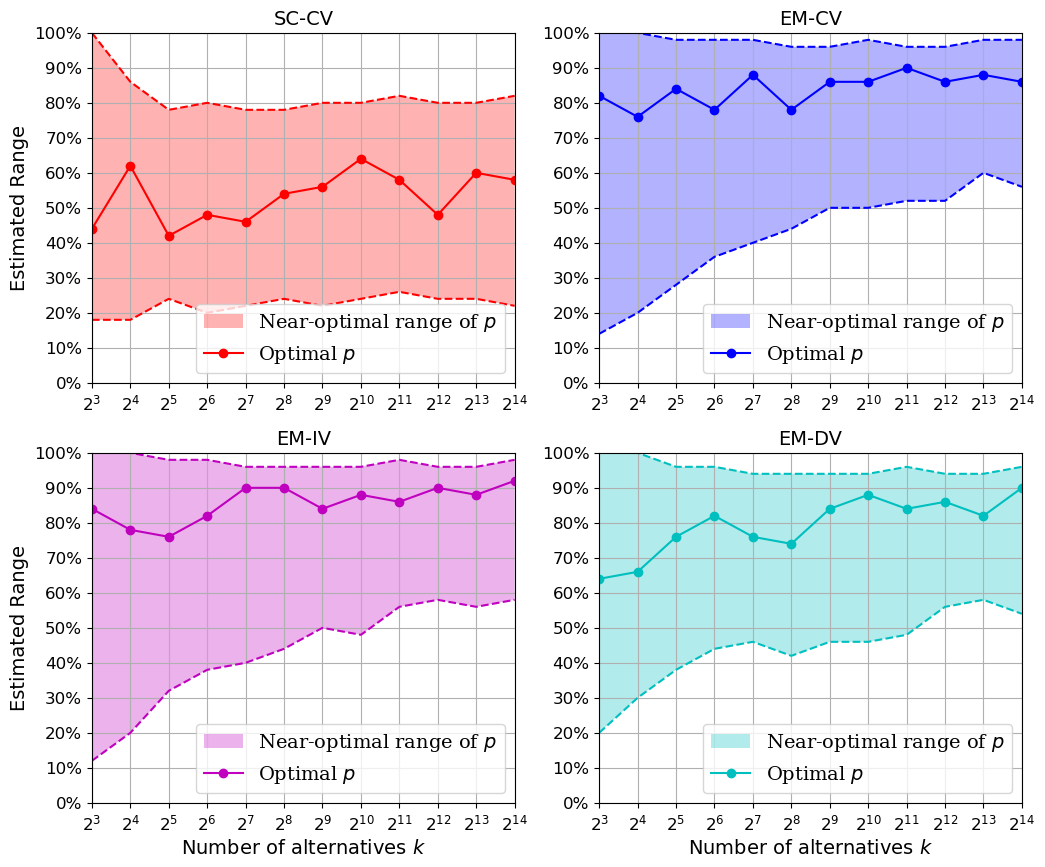

In [6]:
fontsize=14
powers = np.arange(min_power, max_power+1)
_colors = ["r" , "b",  "m","c", "k", "b", "r"]
_markers = ["o", "d", "p", "D", "s", "d", "o"]
_line_styles = ["--", "-.", ":","--", "-.", "--", '-.']

fig = plt.figure(figsize=(12, 10))

gap = 0.10

fig_plots = [(2,2,1), (2,2, 2), (2, 2, 3), (2, 2, 4)]

titles = ["SC-CV", "EM-CV", "EM-IV", "EM-DV"]


for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    
    EFG_results = EFGpcsArray[:, :, i]

    max_PCSs = np.max(EFG_results, axis=1)
    thresholds = max_PCSs - gap
    is_good_enough = EFG_results >= np.repeat(thresholds, 51).reshape(-1, 51)
    starts = [ratios[np.argwhere(row == True)[0][0]] for row in is_good_enough]
    ends =  [ratios[np.argwhere(row == True)[-1][0]]for row in is_good_enough]

    plt.plot(powers, starts, "--",color=_colors[i])
    plt.plot(powers, ends, "--",color=_colors[i])
    plt.fill_between(powers, starts, ends, facecolor=_colors[i], interpolate=True,alpha=0.3, label="Near-optimal range of $p$")

    plt.plot(powers, ratios[np.argmax(EFG_results, axis=1)], "-o", color=_colors[i], label="Optimal $p$")
    
    plt.xlim(min_power, max_power)
    xticks = powers
    xticklabels = ["2^{"+str(power)+"}" for power in xticks]
    xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
    plt.xticks(xticks, xticklabels, fontsize=fontsize-2)
    

    plt.ylim(0.0, 1)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize-2)

    ax.legend(prop={'family': 'serif',"size":fontsize}, loc="lower right")
    if i == 2 or i == 3:
        ax.set_xlabel("Number of alternatives $k$", size=fontsize)
    if i == 0 or i == 2:
        ax.set_ylabel("Estimated Range", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.1)

plt.show()

fig.savefig("Figure_EC4.pdf", bbox_inches='tight')
